# Explore here

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import uniform, norm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Load Bank Marketing Campaign dataset from URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [444]:
# Basic information
print(df.shape)         # Dimensions of the dataset
print(df.info())        # Data types and non-null values    

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [445]:
print(df.columns) # List of column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [446]:
# Find total number of missing values each column left
missing_values = df.isnull().sum()
print(missing_values)   

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [447]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(duplicates)   

0


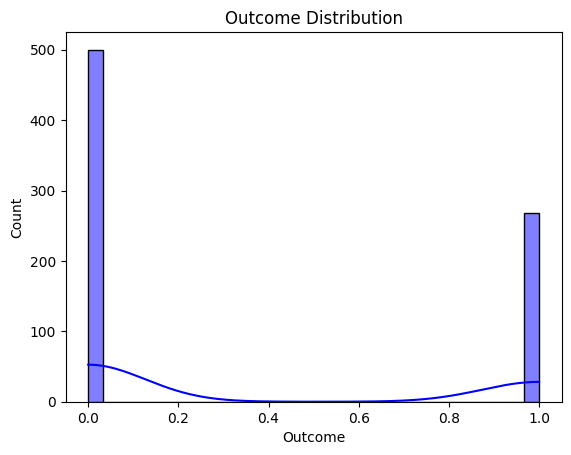

In [448]:
sns.histplot(df['Outcome'], bins=30, kde=True, color='blue')
plt.title('Outcome Distribution')
plt.show()  

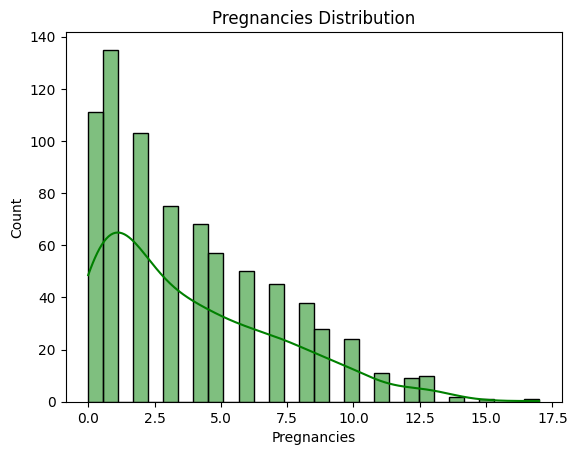

In [449]:
# Campaign contacts ("campaign")
sns.histplot(df['Pregnancies'], bins=30, kde=True, color='green')
plt.title('Pregnancies Distribution')
plt.show()

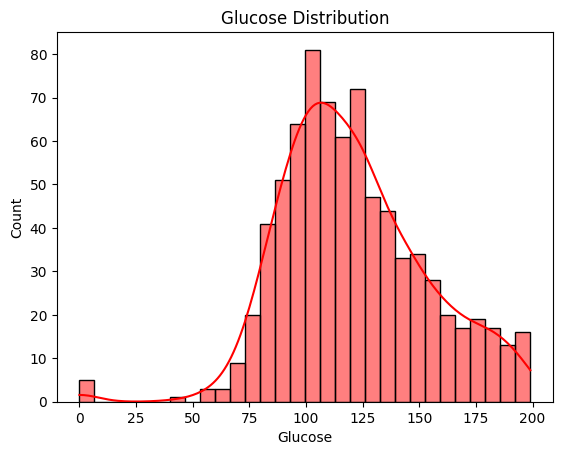

In [450]:
sns.histplot(df['Glucose'], bins=30, kde=True, color='red')
plt.title('Glucose Distribution')
plt.show()

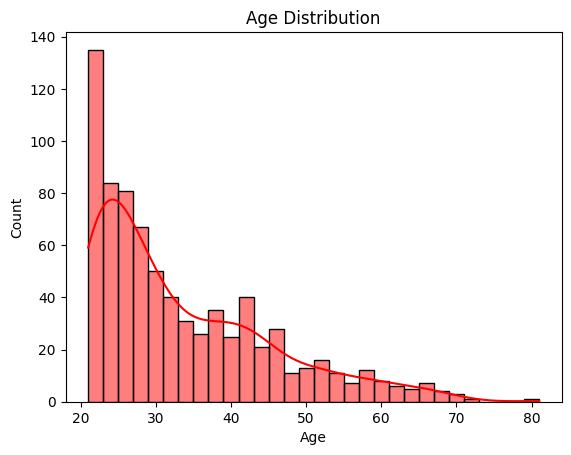

In [451]:
sns.histplot(df['Age'], bins=30, kde=True, color='red')
plt.title('Age Distribution')
plt.show()

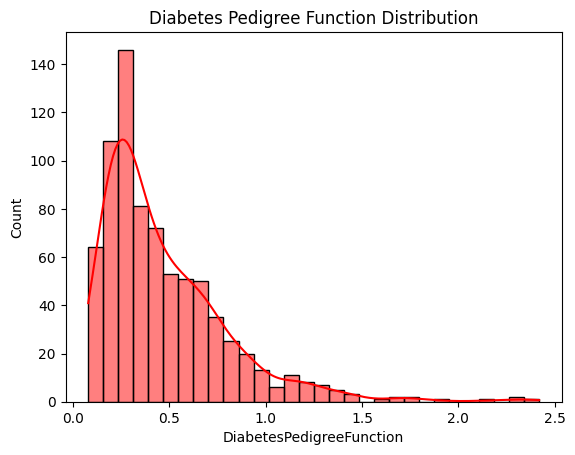

In [452]:
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True, color='red')
plt.title('Diabetes Pedigree Function Distribution')
plt.show()

In [453]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

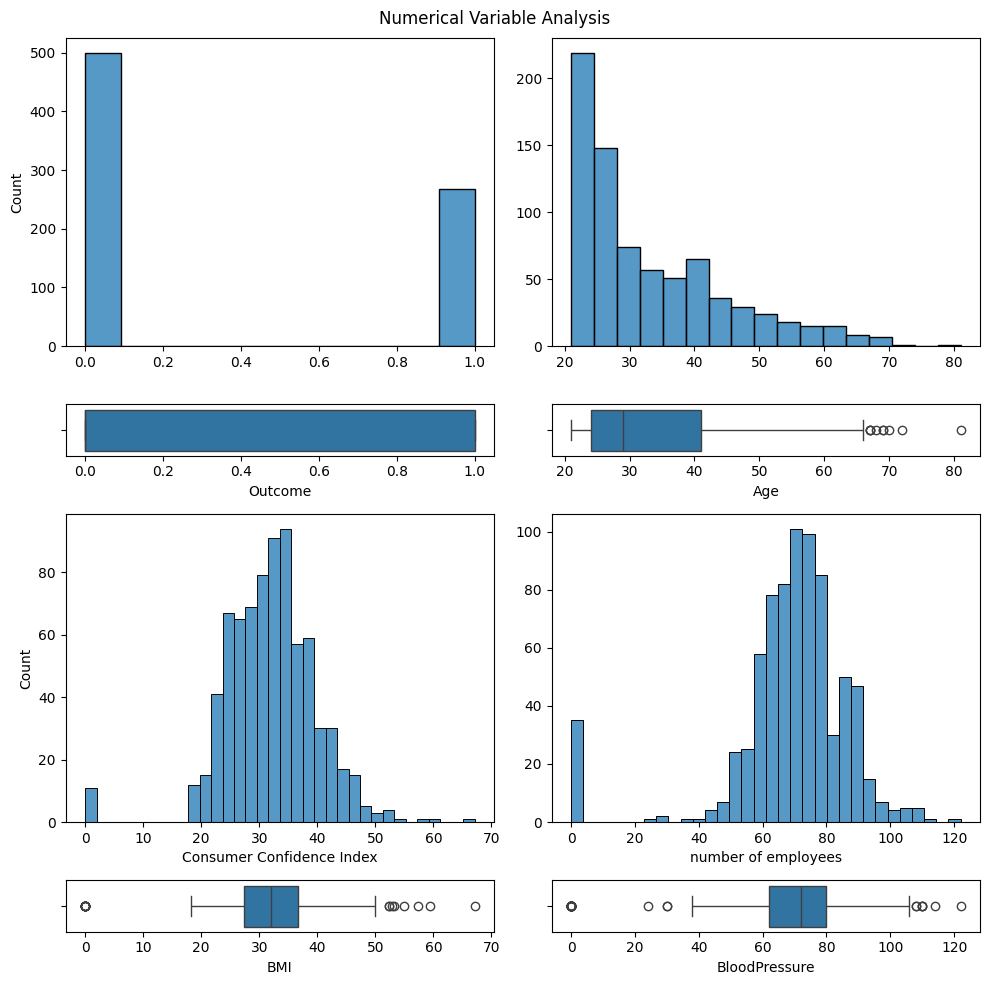

In [454]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "Outcome").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Outcome")
sns.histplot(ax = axis[0, 1], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Age")
sns.histplot(ax = axis[2, 0], data = df, x = "BMI").set(xlabel = 'Consumer Confidence Index')
sns.boxplot(ax = axis[3, 0], data = df, x = "BMI")
sns.histplot(ax = axis[2, 1], data = df, x = "BloodPressure").set(xlabel = 'number of employees', ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "BloodPressure")

plt.suptitle("Numerical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()


In [455]:
# Correlation heatmap
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns 

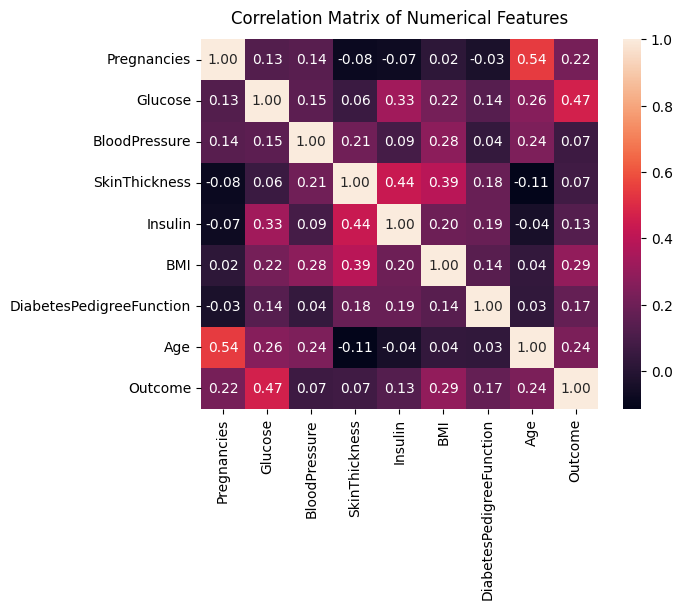

In [456]:
# Create a heatmap
sns.heatmap(df[numerical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features", y=1.02)
plt.show()  

In [457]:
# Split the data into x and y 
X = df.drop('Outcome', axis=1) 
y = df['Outcome']  # The target variable (subscription outcome)

In [458]:
X.shape

(768, 8)

In [459]:
y.shape

(768,)

In [460]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=315)

In [461]:
# Split 80% of data is train data

print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Proportion of train set: {X_train.shape[0]} / {df.shape[0]} = {X_train.shape[0]/df.shape[0]:.2f} = {X_train.shape[0]/df.shape[0]*100:.0f}%")    

Total rows: 768
Dimensions of X_train: (614, 8)
Dimensions of y_train: (614,)
Proportion of train set: 614 / 768 = 0.80 = 80%


In [462]:
# Split 20% of data is train data

print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_test: {y_test.shape}")
print(f"Proportion of test set: {X_test.shape[0]} / {df.shape[0]} = {X_test.shape[0]/df.shape[0]:.2f} = {X_test.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 768
Dimensions of X_test: (154, 8)
Dimensions of y_test: (154,)
Proportion of test set: 154 / 768 = 0.20 = 20%


In [463]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.851792,120.605863,69.602606,21.307818,83.459283,32.215961,0.473090,33.245928
std,3.403173,31.483407,18.224136,16.055309,120.021358,7.706636,0.339908,11.742608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.239250,24.000000
50%,3.000000,117.000000,72.000000,24.000000,39.000000,32.350000,0.370500,29.000000
75%,6.000000,138.000000,80.000000,33.000000,130.000000,36.575000,0.628500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000


In [464]:
y_train.describe()

count    614.000000
mean       0.346906
std        0.476373
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [465]:
# pd.factorize() can factorize categorical features to make them numeric (e.g. {"male": 0, "female": 1})
X_train["Pregnancies_n"] = pd.factorize(X_train["Pregnancies"])[0]
X_train["Glucose_n"] = pd.factorize(X_train["Glucose"])[0]
X_train["BloodPressure_n"] = pd.factorize(X_train["BloodPressure"])[0]
X_train["SkinThickness_n"] = pd.factorize(X_train["SkinThickness"])[0]
X_train["Insulin_n"] = pd.factorize(X_train["Insulin"])[0]
X_train["BMI_n"] = pd.factorize(X_train["BMI"])[0]
X_train["DiabetesPedigreeFunction_n"] = pd.factorize(X_train["DiabetesPedigreeFunction"])[0]
X_train["Age_n"] = pd.factorize(X_train["Age"])[0]

In [466]:
print(X_train.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
765            5      121             72             23      112  26.2   
74             1       79             75             30        0  32.0   
733            2      106             56             27      165  29.0   
740           11      120             80             37      150  42.3   
0              6      148             72             35        0  33.6   

     DiabetesPedigreeFunction  Age  Pregnancies_n  Glucose_n  BloodPressure_n  \
765                     0.245   30              0          0                0   
74                      0.396   22              1          1                1   
733                     0.426   22              2          2                2   
740                     0.785   48              3          3                3   
0                       0.627   50              4          4                0   

     SkinThickness_n  Insulin_n  BMI_n  DiabetesPedigreeFunction_n  

In [467]:
print(X_test.head())    

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
238            9      164             84             21        0  30.8   
27             1       97             66             15      140  23.2   
90             1       80             55              0        0  19.1   
447            0       95             80             45       92  36.5   
107            4      144             58             28      140  29.5   

     DiabetesPedigreeFunction  Age  
238                     0.831   32  
27                      0.487   22  
90                      0.258   21  
447                     0.330   26  
107                     0.287   37  


In [468]:
# Drop original categorical columns
X_train.drop(["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1, inplace=True)

In [469]:
# Drop original categorical columns
X_test.drop(["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1, inplace=True)

In [470]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [471]:
X_train.head(10)    

,Pregnancies_n,Glucose_n,BloodPressure_n,SkinThickness_n,Insulin_n,BMI_n,DiabetesPedigreeFunction_n,Age_n
765,0,0,0,0,0,0,0,0
74,1,1,1,1,1,1,1,1
733,2,2,2,2,2,2,2,1
740,3,3,3,3,3,3,3,2
0,4,4,0,4,1,4,4,3
690,5,5,3,5,1,5,5,4
152,6,6,4,6,4,6,6,5
495,4,7,5,5,1,7,7,6
654,1,2,6,6,5,8,8,1
700,2,8,7,2,6,9,9,7


In [472]:
# Baseline model performance 
# Define a reusable helper function for cross-validation here. We are going to
# be doing a lot of cross-validation, this allows us to reuse this code
# without having to copy-paste it over and over.

def cross_val(model, features: pd.DataFrame, labels: pd.Series) -> list[float]:
    '''Reusable helper function to run cross-validation on a model. Takes model,
    Pandas data frame of features and Pandas data series of labels. Returns 
    list of cross-validation fold accuracy scores as percents.'''

    # Define the cross-validation strategy
    cross_validation=StratifiedKFold(n_splits=7, shuffle=True, random_state=315)

    # Run the cross-validation, collecting the scores
    scores=cross_val_score(
        model,
        features,
        labels,
        cv=cross_validation,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Print mean and standard deviation of the scores
    print(f'Cross-validation accuracy: {(scores.mean() * 100):.2f} +/- {(scores.std() * 100):.2f}%')

    # Return the scores
    return scores

In [473]:
# Instantiate a random forest classifier model
model=DecisionTreeClassifier(random_state=315)

# Run the cross-validation
scores=cross_val(model, X, y) 

Cross-validation accuracy: 70.20 +/- 5.40%


In [474]:
# Check for missing values
print(df.isnull().sum())

# Percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [475]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)      

SelectKBest(k=5)

In [476]:
#Initialize the Model
# Initialize DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=315)

In [477]:
#Fit the model on the training data.

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=315)

In [478]:
print(X_test)
print(type(X_test))
print(X_test.shape)


Empty DataFrame
Columns: []
Index: [238, 27, 90, 447, 107, 70, 317, 435, 588, 723, 408, 178, 282, 77, 638, 459, 393, 314, 413, 175, 562, 336, 421, 416, 431, 102, 91, 321, 118, 623, 55, 494, 145, 672, 726, 598, 696, 84, 148, 443, 417, 587, 589, 323, 566, 668, 394, 340, 256, 759, 151, 462, 525, 722, 58, 71, 427, 215, 278, 242, 476, 176, 511, 218, 678, 693, 67, 573, 547, 33, 103, 480, 766, 78, 744, 115, 648, 399, 15, 601, 474, 43, 184, 513, 739, 543, 196, 646, 381, 488, 101, 380, 382, 391, 363, 548, 457, 18, 643, 356, ...]

[154 rows x 0 columns]
<class 'pandas.core.frame.DataFrame'>
(154, 0)


In [ ]:
#Make Predictions
# Predict on the test set
y_pred = model.predict(X_test)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: at least one array or dtype is required